In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('kaggle/input/maternal-health-risk-data-set.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use the correct file path for Kaggle
df = pd.read_csv('/kaggle/input/maternal-health-risk-data-set/Maternal Health Risk Data Set.csv')

# Set a nice style for the plots
sns.set_style("whitegrid")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

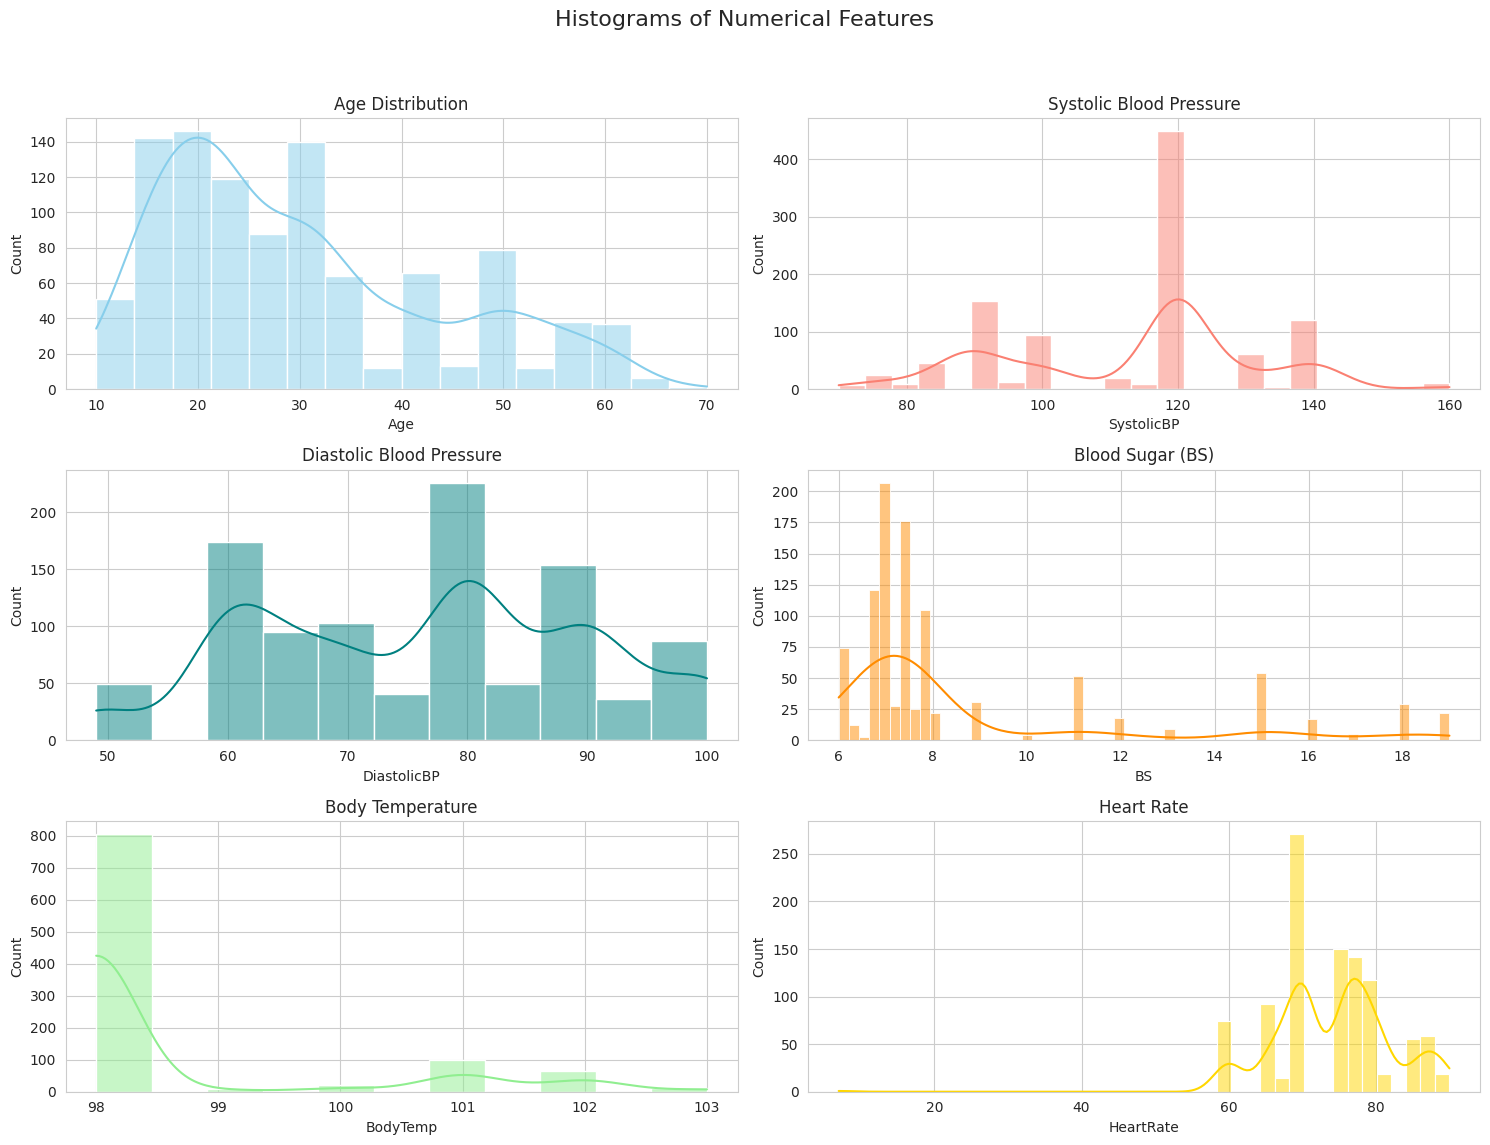

In [15]:
# Set up the figure for subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Histograms of Numerical Features', fontsize=16)

# Plot histograms
sns.histplot(df['Age'], ax=axes[0, 0], kde=True, color='skyblue')
axes[0, 0].set_title('Age Distribution')

sns.histplot(df['SystolicBP'], ax=axes[0, 1], kde=True, color='salmon')
axes[0, 1].set_title('Systolic Blood Pressure')

sns.histplot(df['DiastolicBP'], ax=axes[1, 0], kde=True, color='teal')
axes[1, 0].set_title('Diastolic Blood Pressure')

sns.histplot(df['BS'], ax=axes[1, 1], kde=True, color='darkorange')
axes[1, 1].set_title('Blood Sugar (BS)')

sns.histplot(df['BodyTemp'], ax=axes[2, 0], kde=True, color='lightgreen')
axes[2, 0].set_title('Body Temperature')

sns.histplot(df['HeartRate'], ax=axes[2, 1], kde=True, color='gold')
axes[2, 1].set_title('Heart Rate')

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Text(0, 0.5, 'Count')

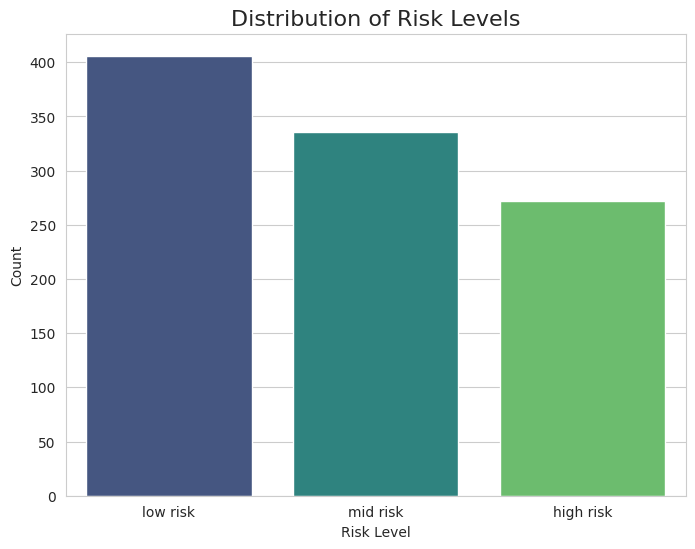

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='RiskLevel', data=df, order=['low risk', 'mid risk', 'high risk'], palette='viridis')
plt.title('Distribution of Risk Levels', fontsize=16)
plt.xlabel('Risk Level')
plt.ylabel('Count')

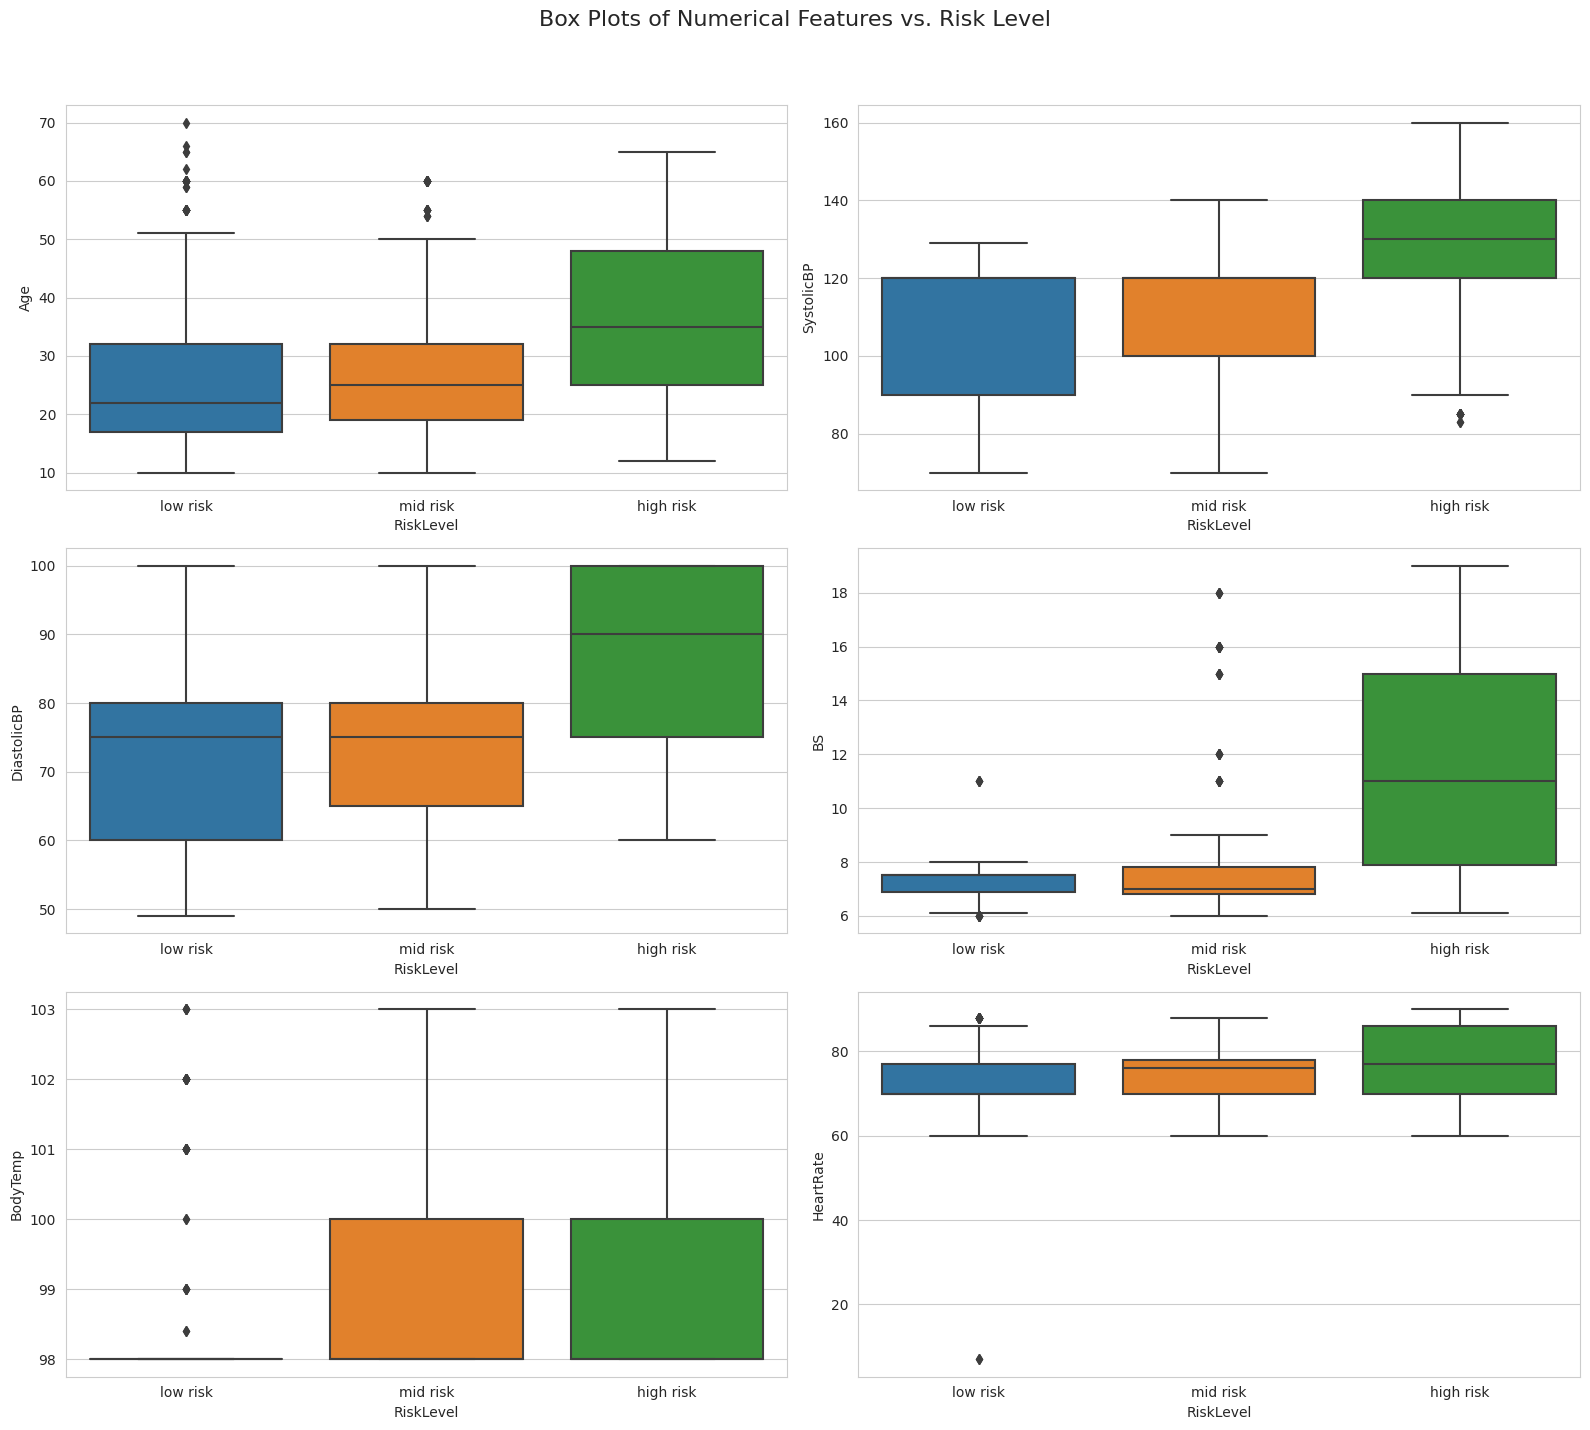

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(16, 15))
fig.suptitle('Box Plots of Numerical Features vs. Risk Level', fontsize=16)

# Plot boxplots
sns.boxplot(x='RiskLevel', y='Age', data=df, ax=axes[0, 0], order=['low risk', 'mid risk', 'high risk'])
sns.boxplot(x='RiskLevel', y='SystolicBP', data=df, ax=axes[0, 1], order=['low risk', 'mid risk', 'high risk'])
sns.boxplot(x='RiskLevel', y='DiastolicBP', data=df, ax=axes[1, 0], order=['low risk', 'mid risk', 'high risk'])
sns.boxplot(x='RiskLevel', y='BS', data=df, ax=axes[1, 1], order=['low risk', 'mid risk', 'high risk'])
sns.boxplot(x='RiskLevel', y='BodyTemp', data=df, ax=axes[2, 0], order=['low risk', 'mid risk', 'high risk'])
sns.boxplot(x='RiskLevel', y='HeartRate', data=df, ax=axes[2, 1], order=['low risk', 'mid risk', 'high risk'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Text(0.5, 1.0, 'Correlation Heatmap of Features')

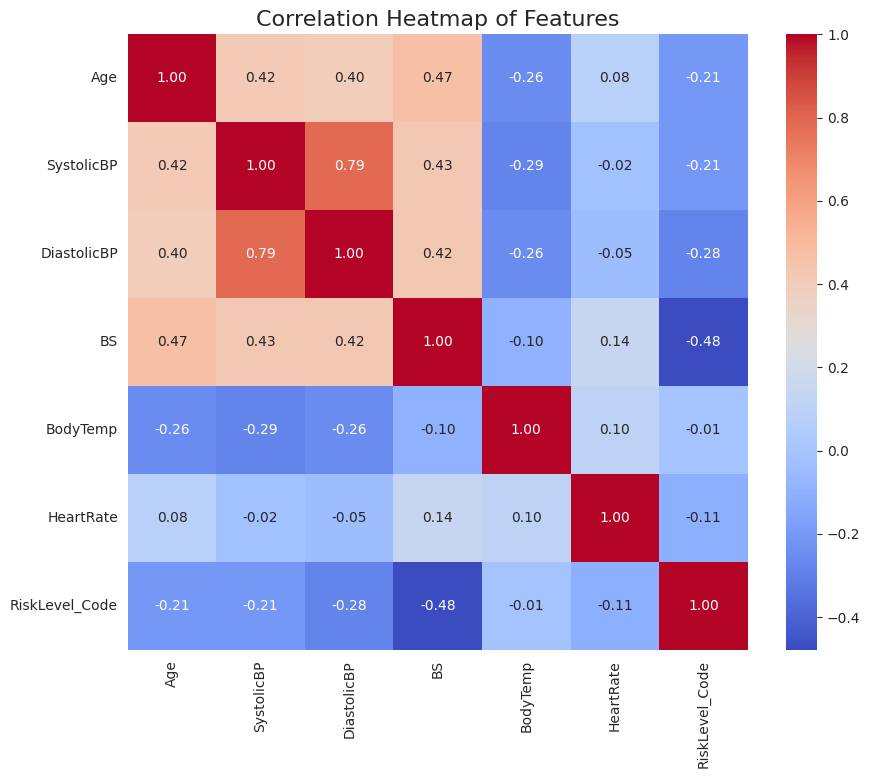

In [18]:
plt.figure(figsize=(10, 8))

# Create a copy of the dataframe for encoding the target variable
df_corr = df.copy()
df_corr['RiskLevel_Code'] = df_corr['RiskLevel'].astype('category').cat.codes

# Calculate the correlation matrix
correlation_matrix = df_corr.drop('RiskLevel', axis=1).corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features', fontsize=16)

Text(0, 0.5, 'Feature')

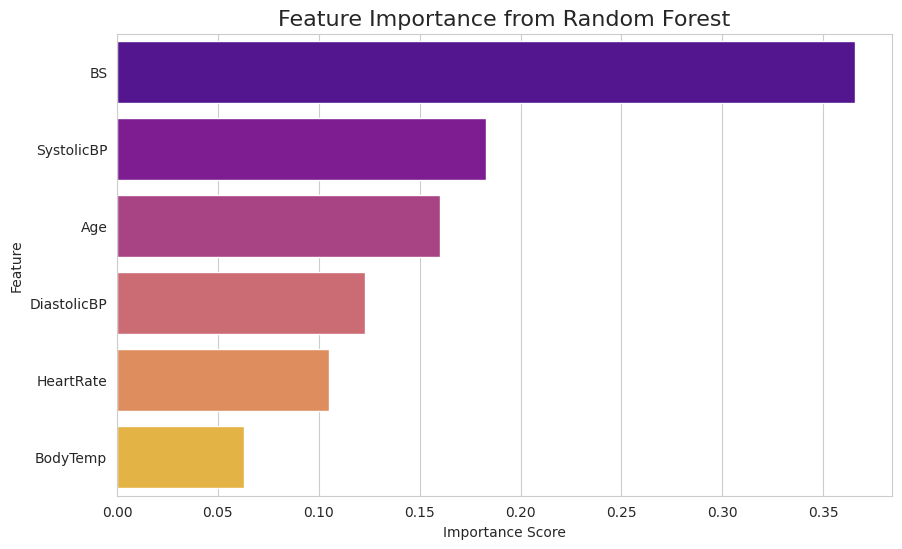

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# --- Feature Importance Plot using a Random Forest ---

# Prepare the data
# X contains all the feature columns
X = df.drop('RiskLevel', axis=1)
# y contains the target variable we want to predict
y = df['RiskLevel']

# Machine learning models need numbers, so we encode the text labels into numbers
# e.g., 'low risk' -> 0, 'mid risk' -> 1, 'high risk' -> 2
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y_encoded)

# Get feature importances from the trained model
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='plasma')
plt.title('Feature Importance from Random Forest', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature')